In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import re
import pickle


In [43]:
with open("data/cic_2023.pkl", "rb") as f:
    omni = pickle.load(f)

In [44]:
import os
def load_data(directory):
    data = []
    for file in tqdm(os.listdir(directory)):
        if file.endswith('.csv'):
            df = pd.read_csv(os.path.join(directory, file))
            data.append(df)
    return pd.concat(data, ignore_index=True)

df = load_data('data/CICIoT2023')
# Clean column names (in case of whitespace)
df.columns = df.columns.str.strip()

 32%|███▏      | 54/169 [00:57<02:01,  1.06s/it]


MemoryError: Unable to allocate 82.7 MiB for an array with shape (46, 235625) and data type float64

In [ ]:
df.shape

(46686579, 47)

In [ ]:
train, test = train_test_split(df,train_size=500000)

In [ ]:
# Mapping OmniPot feature names to exact CIC feature names
cic_compatible_mapping = {
    'CIC_FlowDuration': 'flow_duration',
    'CIC_TotPkts': 'Tot sum',
    'CIC_TotLen': 'Tot size',
    'CIC_PktLenMean': 'AVG',
    'CIC_PktLenMin': 'Min',
    'CIC_PktLenMax': 'Max',
    'CIC_PktLenStd': 'Std',
    'CIC_PktLenVar': 'Variance',
    'CIC_PktsPerSec': 'Srate',
    'CIC_BytesPerSec': 'Drate',

    'TELNET': 'Telnet'
}


In [ ]:
omni_df_cic = omni.rename(columns=cic_compatible_mapping)

# Only keep the columns that exist in both
existing_cic_columns = [col for col in df.columns if col in omni_df_cic.columns]
omni_df = omni_df_cic[existing_cic_columns]

cic_df = train[existing_cic_columns].copy()

In [ ]:
omni_df.describe()

,flow_duration,Srate,Drate,HTTP,HTTPS,Telnet,SMTP,SSH,Tot sum,Min,Max,AVG,Std,Tot size,Variance
count,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,377586.000000,3.775860e+05
mean,6.077776,0.230455,34.784752,0.086783,0.097898,0.202741,0.004161,0.182295,1.787892,90.530724,133.373128,109.989215,18.022375,218.542181,5.006948e+03
std,31.536821,0.814264,222.078620,0.281517,0.297177,0.402041,0.064369,0.386088,2.144238,252.753377,294.148484,257.587161,68.426272,690.245023,6.551635e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,27.000000,25.000000,0.000000,36.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,54.000000,147.000000,81.000000,0.000000,239.000000,0.000000e+00
max,1508.000000,129.500000,43959.500000,1.000000,1.000000,1.000000,1.000000,1.000000,518.000000,6995.000000,6996.000000,6995.500000,1394.852760,175838.000000,1.945614e+06


In [ ]:
cic_df.describe()

,flow_duration,Srate,Drate,HTTP,HTTPS,Telnet,SMTP,SSH,Tot sum,Min,Max,AVG,Std,Tot size,Variance
count,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,500000.0,500000.0,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,6.261263,8.966109e+03,9.694516e-07,0.048180,0.055838,0.0,0.0,0.000050,1310.491399,91.435004,182.765690,124.710690,33.579500,124.707986,0.096444
std,335.170999,9.808148e+04,1.619429e-04,0.214147,0.229609,0.0,0.0,0.007071,2625.387560,139.080541,530.418516,241.584144,162.370226,242.342476,0.233158
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,42.000000,42.000000,42.000000,42.000000,0.000000,42.000000,0.000000
25%,0.000000,2.080009e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,525.000000,50.000000,50.000000,50.000000,0.000000,50.000000,0.000000
50%,0.000000,1.570102e+01,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,567.000000,54.000000,54.000000,54.000000,0.000000,54.000000,0.000000
75%,0.105816,1.167501e+02,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,567.540000,54.000000,55.280000,54.050113,0.370496,54.060000,0.080000
max,131456.220456,7.340032e+06,5.292377e-02,1.000000,1.000000,0.0,0.0,1.000000,79986.000000,3397.100000,26130.000000,6388.946389,6651.052405,10491.600000,1.000000


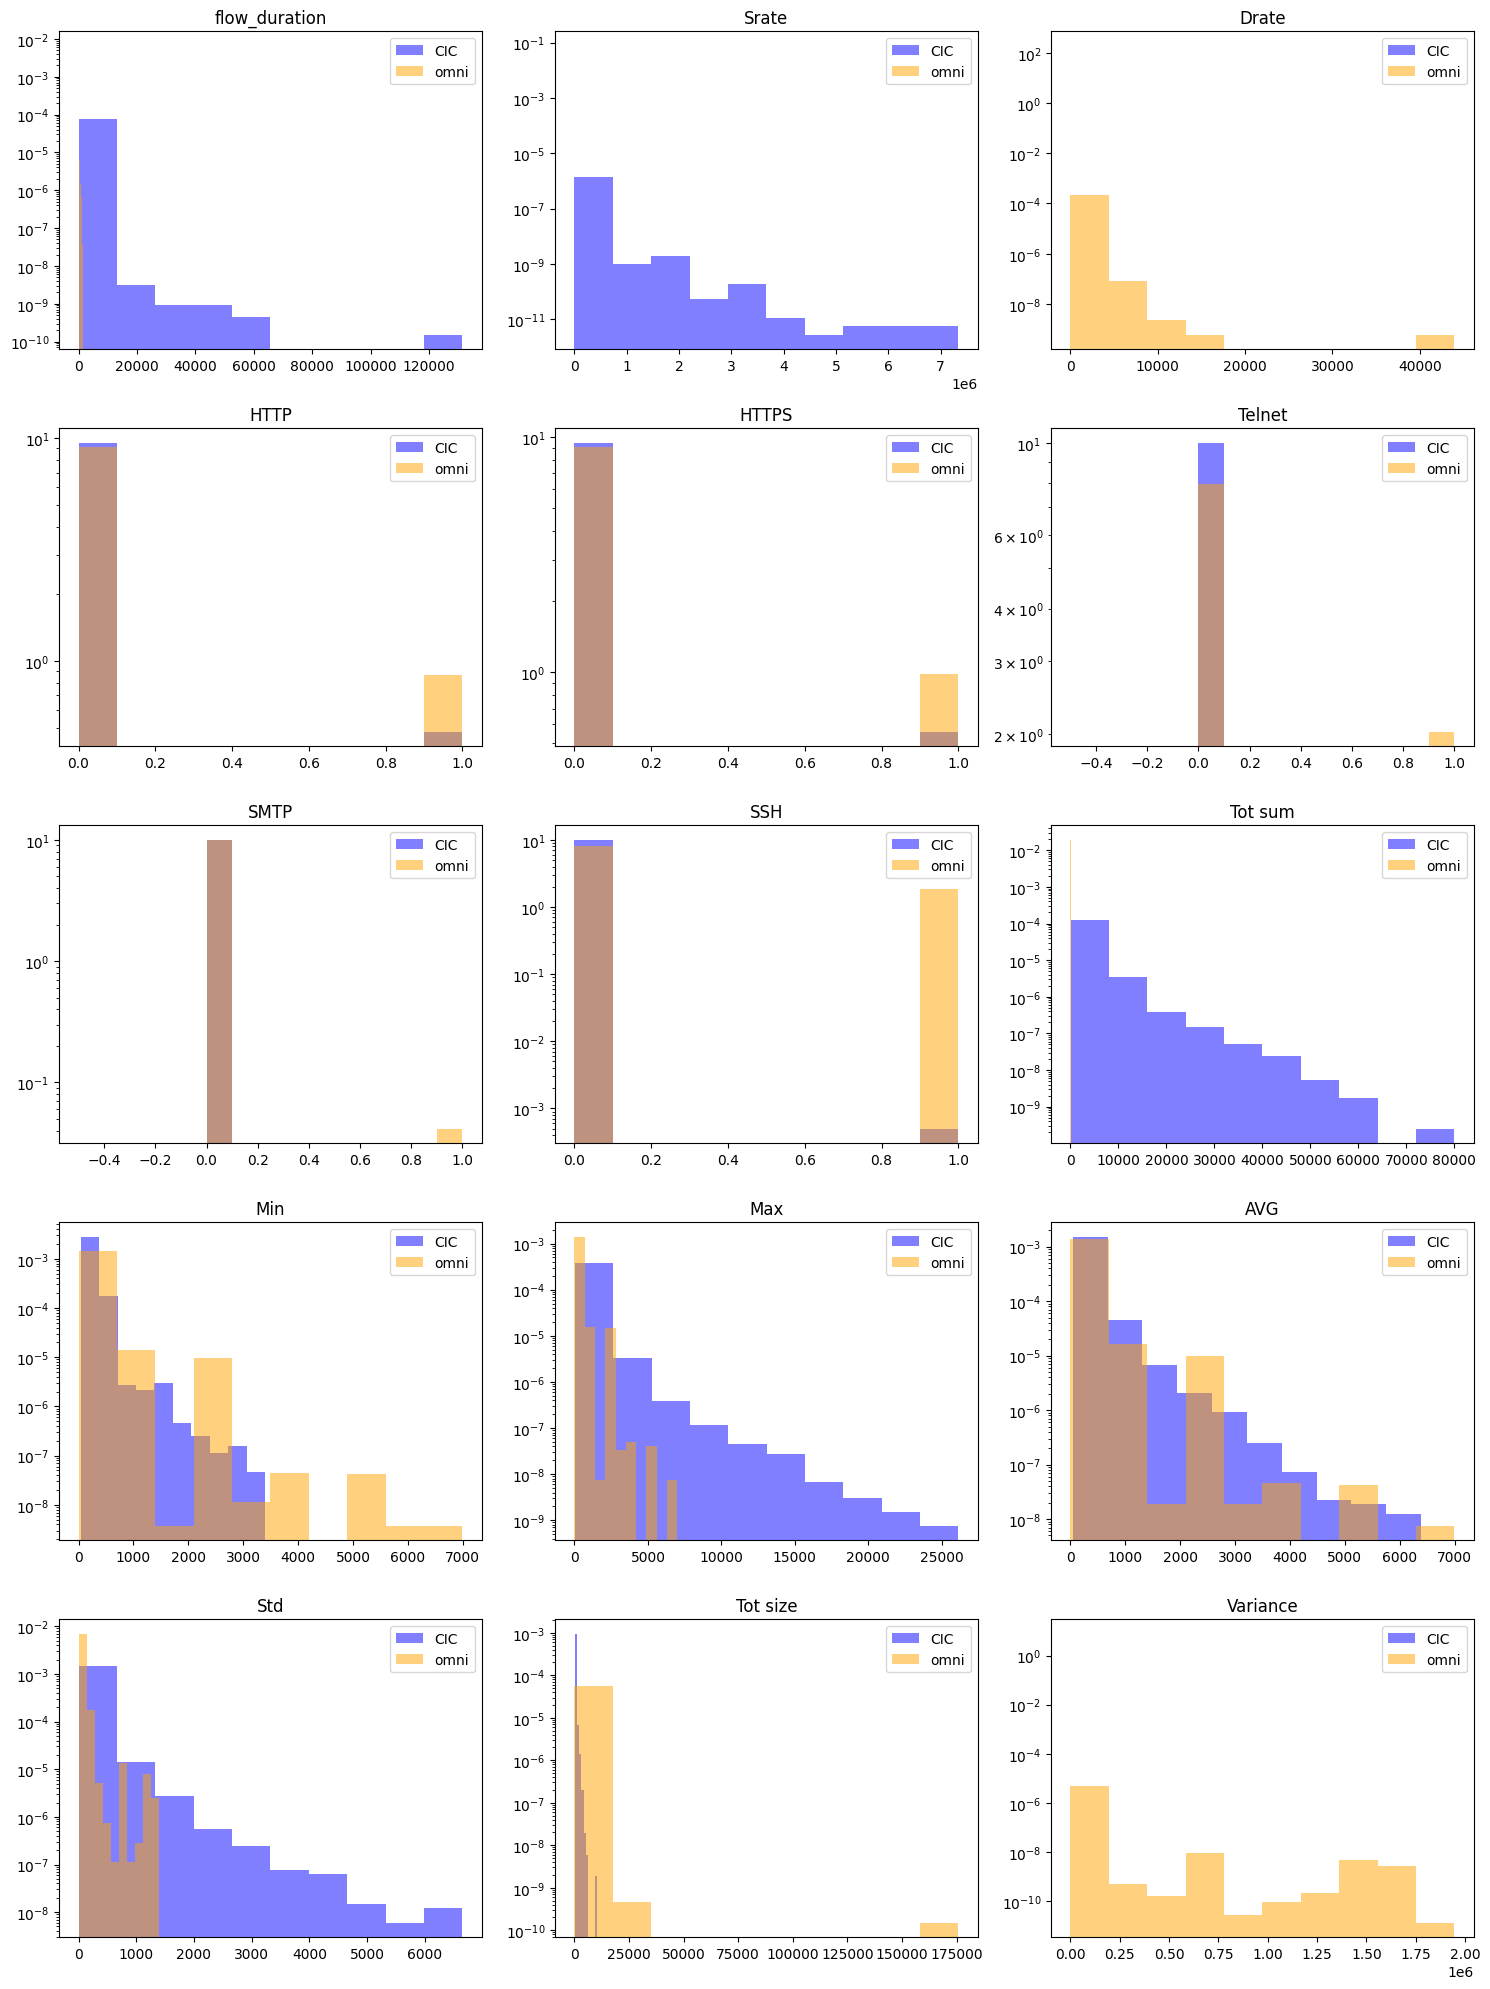

In [ ]:
features = omni_df.select_dtypes(include='number').columns
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(cic_df[feature], bins=10, alpha=0.5, label='CIC', color='blue', density=True)
    plt.hist(omni_df[feature], bins=10, alpha=0.5, label='omni', color='orange', density=True)
    plt.title(feature)
    plt.legend()
    plt.yscale('log')


plt.tight_layout()
plt.show()

In [ ]:
omni_df.drop(columns=["Srate","Drate"])